# 1 Author

**Student Name**:  Shrey Suresh Chandra Jakhmola <br>
**Student ID**:  230925447


# 2 Problem formulation

To build a machine learning pipeline using the MLEnd Yummy dataset to predict whether a given input image of a dish is either rice or chips from a dataset of rice and chips.
The problem is interesting because the large dataset doesn't contain labels of the images; that is for whether a given image is rice and chips and that has to be processed. Additionally, the features are supposed to be extracted from an image, which opens an opportunity to explore feature extraction for our problem.

# 3 Machine Learning pipeline

**The pipeline consists of:**

1. **Initialising the dataset**: Initialising the data(an image) from a dataset or initialising a single file from a location which is the input to the pipeline. The image is of the format JPEG.

2. **Transformation**: The image is then processed for feature extraction. The input to this stage is filename of the image and output are the features extracted. The format of the input filename is text and the output is a 1D NumPy array which are the HOG features extracted.

3. **Prediction (model):** The features extracted in the transformation stage are then taken as an input for the model and the model predicts whether then given input features are either of the rice and chips. The input is a NumPy array where each row corresponds to the features of a dish, and the columns represent the individual features which is the training data. The label input is a Pandas Series containing the target labels for the training data. It represents the ground truth for whether each corresponding dish is rice or chips. The output is a NumPy array containing the predicted labels for the data. The element in the output represents the model's prediction for whether the corresponding dish is rice or chips.

# 4 Transformation stage

**Resizing the image and feature extraction using Histogram of oriented gradients.**

The input to this stage filename of the image and output is a 1D NumPy array representing the HOG features of the corresponding image.<br>

In this stage,
1. The image is read in grayscale and resized to a fixed height and width of 200x200 using OpenCV. The input for this processing is a NumPy array representing the grayscale image and the output is the resized array representing the image. This is done to reduce the number of features extracted since the model was not trained on large sample. Additionally, resizing also reduces the computation time for extracting the features.<br><br>
2. The resized numpy array is then processed for extracting the histogram of oriented gradients (HOG). The HOG processing outputs a returns a 1D NumPy array representing the HOG features of the corresponding image. The use of HOG (Histogram of Oriented Gradients)is motivated by its ability to capture important structural information about an object because it describes the distribution of local gradient orientations in an image, providing a representation of the object's shape and texture. It can also recognize objects regardless of their position in the image along with less sensitive to changes in illumination compared to pixel intensities.

# 5 Modelling

**Model:** Support vector machine with a linear kernel. The model will take the training data and corresponding label data as input and predict whether the given data of the dish is of a rice or chips.

Reason for choosing the model:

1. SVMs are a powerful class of supervised learning algorithms used for classification and regression tasks. They work well for tasks with a clear margin of separation between classes. The linear kernel is chosen when the decision boundary between classes is expected to be approximately linear.
2. The linear kernel is a good choice when the classes can be separated by a straight line. It works well when the relationship between the features and the target variable is approximately linear. Using a linear kernel simplifies the model and can be computationally efficient.

In summary, the chosen model is a linear SVM, and it is used for binary classification to predict whether a dish is rice or chips. The linear kernel is suitable for cases where a linear decision boundary is appropriate, and the choice of features, obtained through image preprocessing and HOG extraction, is essential for the model's effectiveness in distinguishing between the two classes.

# 6 Methodology

**Training and Validation of Models, Performance Assessment**

1. **Training data**<br>
    a. We will process the data for feature extraction to extract relevant features from dish images.<br>
    b. Then we will split the data. Splitting the dataset into training and testing sets using train_test_split. This step is crucial to ensure that the model is trained on one subset of the data and validated on another, allowing for an unbiased evaluation of its generalization performance. We will be dedicating 80% of the data for model training and 20% for evaluation.<br>
    c. Training the model on the training set. The model learns to distinguish between features extracted from images of rice and chips. <br>

2. **Validation of models**<br>
    a. Accuracy Calculation: Evaluate the accuracy of the model on both the training and testing sets. <br>
    b. Training accuracy is assessed by scoring the model for the training data and its predicted label used for input<br>
    c. Testing accuracy is computed by scoring the model for the test data and its predicted labels <br>

3. **Performance Assessment**<br>
    a. **Confusion Matrix**: Generating a confusion matrix using test data and its predicted labels. The confusion matrix provides detailed information on the model's performance, indicating true positives, true negatives, false positives, and false negatives. Additionally, visualize the normalized confusion matrix using Seaborn's heatmap.<br>
    b. **Classification report:** Generate classification report using test data and it predicted label to calculate precision, recall, and F1-score for each class, along with overall metrics. It provides insights into the model's performance on a per-class basis.<br>
    c. **Per Class Accuracies**: Calculate per-class accuracies using the confusion matrix. This step provides a nuanced understanding of how well the model performs for each individual class.<br>

4. **Result Analysis and Reporting:** <br>
    a. Interpret the obtained metrics to assess the model's effectiveness. Key considerations include the overall accuracy, per-class performance, and potential class imbalances.


In [2]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.5 MB/s eta 0:00:00


# 7 Dataset



The dataset we will be using is the MLEnd Yummy dataset from : https://mlend.readthedocs.io/en/latest/#mlend-yummy. The dataset contains more than 3000 images of dishes along with their attributes. We will be using the images as well their attributes for prediction and data visualization.

<br><br>
The attributes are: <br>
'filename' : Name of the image file <br>
'Diet': Vegetarian/vegan/Non-vegetarian<br>
'Cuisine_org': Type of cuisine <br>
'Cuisine': Type of cuisine<br>
'Dish_name': Name of the dish<br>
'Home_or_restaurant': Whether the dish was prepared in home or restaurant<br>
'Ingredients': Ingredients of the dish<br>
'Healthiness_rating': Whether is the dish is healtly not healthy etc<br>
'Healthiness_rating_int': Numeric Healthiness_rating<br>
'Likeness': Like or dis-like etc<br>
'Likeness_int': Numeric Likeness<br>
'Benchmark_A': Whether row to be used as test or train<br>
<br>
1. Attributes used in experiment: Derived label Foot_Type from Dish_name and Ingredients
2. Attributes used in visualisation: Healthiness_rating_int, Likeliness_int and Derived label Foot_Type from Dish_name and Ingredients

<h3>Downloading and Preprocessing the entire dataset to generate labeled data whether a dish is chips or rice and filtering our data for usage.</h3>

In [5]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

import mlend
from mlend import download_yummy, yummy_load

import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#downloading the data
drive.mount('/content/drive', force_remount=True)
subset = {}
datadir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEndBigSet/', subset = subset,verbose=1,overwrite=False)

#reading the data csv with attributes of the images
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEndBigSet/yummy/MLEndYD_image_attributes_benchmark.csv')
MLENDYD_df.columns

# Create a new column 'Food_Type' based on conditions
MLENDYD_df['Food_Type'] = ''

# Label rows containing 'fries' or 'chips' in Dish_name or Ingredients as 'chips'
MLENDYD_df.loc[MLENDYD_df['Dish_name'].str.lower().str.contains('fries|chips', case=False) & MLENDYD_df['Ingredients'].str.lower().str.contains('chip|fries|chips|potato|potatoes', case=False) & ~MLENDYD_df['Ingredients'].str.lower().str.contains('rice', case=False), 'Food_Type'] = 'chips'
MLENDYD_df.loc[MLENDYD_df['Ingredients'].str.lower().str.contains('fries|chips', case=False) & ~MLENDYD_df['Ingredients'].str.lower().str.contains('rice', case=False), 'Food_Type'] = 'chips'

# Label rows containing 'rice' in Dish_name or Ingredients as 'rice'
MLENDYD_df.loc[MLENDYD_df['Dish_name'].str.lower().str.contains('rice', case=False) & MLENDYD_df['Ingredients'].str.lower().str.contains('rice', case=False) & ~MLENDYD_df['Ingredients'].str.lower().str.contains('chip|fries|chips|potato|potatoes', case=False), 'Food_Type'] = 'rice'

# Create separate DataFrames for 'rice' and 'chips'
rice_df = MLENDYD_df[MLENDYD_df['Food_Type'] == 'rice']
chips_df = MLENDYD_df[MLENDYD_df['Food_Type'] == 'chips']

#Display the dataframes with rice and chips
display(rice_df)
display(chips_df)

#Print the size of the dataframes
print("Size of the chips df:",len(chips_df))
print("Size of the rice df:",len(rice_df))

#Filter the main df for rice and chips labeled data only
MLENDYD_df = MLENDYD_df[MLENDYD_df['Food_Type'].isin(['rice', 'chips'])]

#Taking balanaced dataset for input by reducing the size of samples labeled as rice
MLENDYD_df_r = MLENDYD_df[MLENDYD_df['Food_Type'].isin(['rice'])].tail(135)
MLENDYD_df_c = MLENDYD_df[MLENDYD_df['Food_Type'].isin(['chips'])]
MLENDYD_df = pd.concat([MLENDYD_df_r,MLENDYD_df_c])

Mounted at /content/drive
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


,filename,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Food_Type
0,000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,rice
19,000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,rice
21,000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,rice
34,000035.jpg,vegan,indian,indian,cauliflower_curry_rice,home,"rice,cauliflower,spices,ginger,garlic,chillies...",very_healthy,5.0,strongly_like,5.0,Train,rice
37,000038.jpg,non_vegetarian,indian,indian,rice_with_chicken_curry,home,"boiled_rice,chicken,sunflower_oil,chilli_powde...",healthy,4.0,strongly_like,5.0,Test,rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,003225.jpg,vegetarian,indian,indian,sweet_and_spicy_flattened_rice,home,"flattened_rice,oil,curry_leaves,mustard_seeds,...",very_healthy,5.0,like,4.0,Train,rice
3228,003229.jpg,vegetarian,south_indian,south_indian,lemon_rice,home,"rice,onion,chilli,turmeric_powder,tomato,salt,...",healthy,4.0,like,4.0,Train,rice
3233,003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test,rice
3242,003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train,rice


,filename,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Food_Type
23,000024.jpg,vegan,british,british,pie_and_chips,home,"mushroom_pie,chips,peas",neutral,3.0,like,4.0,Train,chips
95,000096.jpg,non_vegetarian,english,english,"fish_burger,chips,onion_rings",home,"cod_fillets,panko_bread_crumbs,onions,potatoes...",unhealthy,2.0,like,4.0,Train,chips
106,000107.jpg,vegetarian,english,english,sandwich_with_potatos_fries,home,"bread,potato,tomato,onion,spices,potato_fries",unhealthy,2.0,strongly_like,5.0,Test,chips
137,000138.jpg,vegetarian,english,english,banana_and_chocolate_chip_muffin,home,"chocolate_chips,self-raising_flour,caster_suga...",unhealthy,2.0,like,4.0,Train,chips
140,000141.jpg,non_vegetarian,american,american,spicy_chicken_burger_meal,restaurant,"bun,lettuce,chicken_chops,french_fries,sloppy_...",unhealthy,2.0,strongly_like,5.0,Train,chips
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,003181.jpg,non_vegetarian,american,american,beef_burger_and_chips,flames,"burgen_bun,onion,cheese,ketchup,lettuce,tomato...",neutral,3.0,strongly_like,5.0,Train,chips
3186,003187.jpg,non_vegetarian,american,american,"cheese_burger,2_wings_with_fries_and_drink",green_pepper,"regular_bun,beef,american_cheese,ketchup,chopp...",unhealthy,2.0,neutral,3.0,Train,chips
3219,003220.jpg,vegetarian,british,british,chicken_with_pancakes,restaurant,"pancakes,french_fries,chicken,red_cabbage",healthy,4.0,dislike,2.0,Train,chips
3230,003231.jpg,non_vegetarian,american,american,chicken_burger_and_fries,mcdonalds,"burger_buns,chicken,cheese,mayonnaise,ketchup,...",unhealthy,2.0,like,4.0,Train,chips


Size of the chips df: 135
Size of the rice df: 394


<h3>Visualizing the samples after preprocessing</h3>

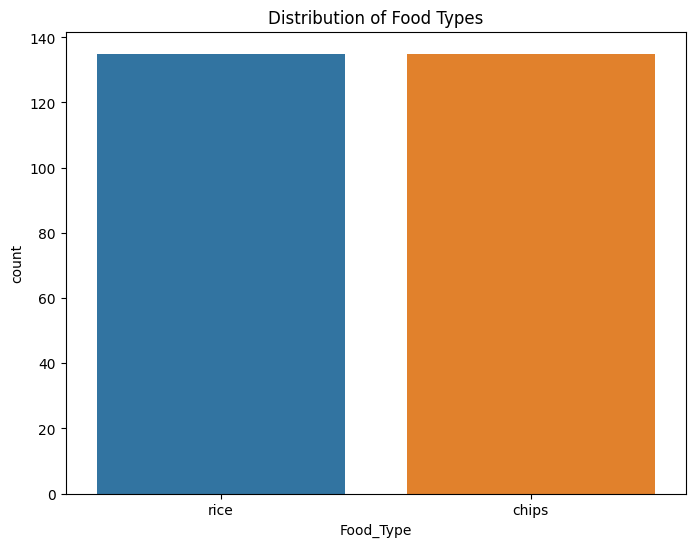

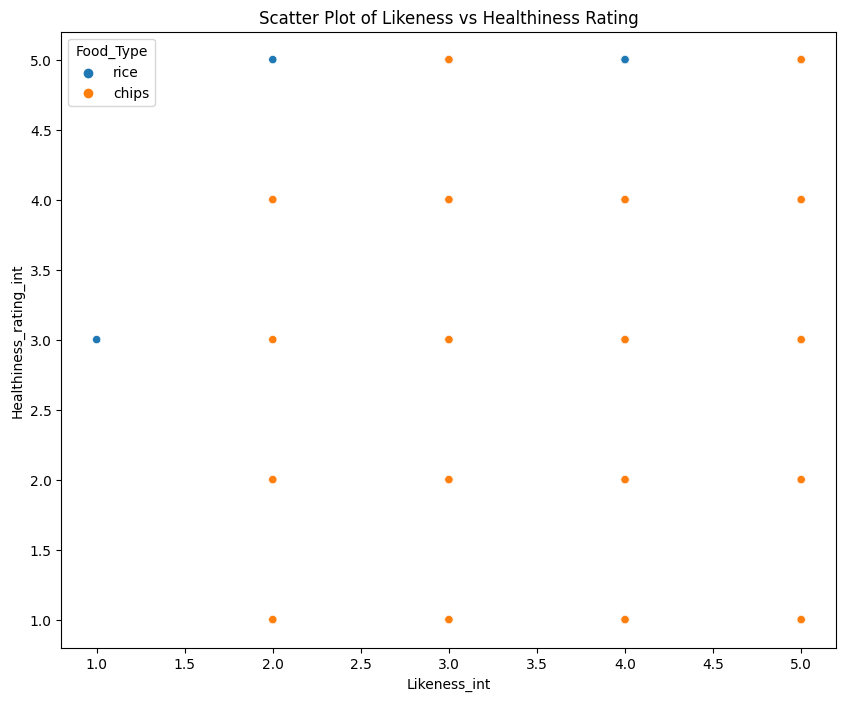

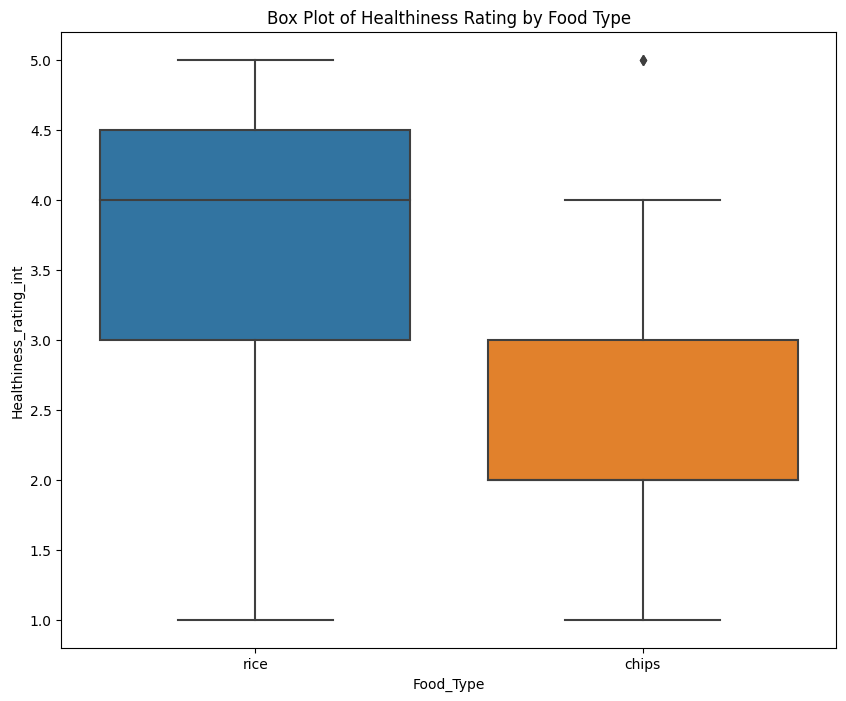

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Count Plot for Food_Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Food_Type', data=MLENDYD_df)
plt.title('Distribution of Food Types')
plt.show()

# Visualization 2: Scatter Plot for Likeness and Healthiness Rating
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Likeness_int', y='Healthiness_rating_int', hue='Food_Type', data=MLENDYD_df)
plt.title('Scatter Plot of Likeness vs Healthiness Rating')
plt.show()

# Visualization 3: Box Plot for Healthiness Rating by Food Type
plt.figure(figsize=(10, 8))
sns.boxplot(x='Food_Type', y='Healthiness_rating_int', data=MLENDYD_df)
plt.title('Box Plot of Healthiness Rating by Food Type')
plt.show()


<h3>Extracting features</h3>

In [6]:
#Image folder path
image_folder = '/content/drive/MyDrive/Data/MLEndBigSet/yummy/MLEndYD_images'

# Resize images to a specific width and height
def resize_image(image, width=200, height=200):
    return cv2.resize(image, (width, height))

# Resize images and Extract features from images using OpenCV (HOG)
def extract_features(filename):
    image_path = os.path.join(image_folder, filename)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

    # Resize the image
    resized_img = resize_image(img)

    hog = cv2.HOGDescriptor()
    features = hog.compute(resized_img)
    return features.flatten()

# Initialize the scaler object
scaler = StandardScaler()

# Apply the feature extraction function to each row in the DataFrame
MLENDYD_df['normalized_features'] = MLENDYD_df.apply(lambda row: scaler.fit_transform(extract_features(row['filename']).reshape(-1, 1)).flatten(), axis=1)

# 8 Results

We will now split our dataset into test and train and train out model using train dataset and test it on the test dataset.

In [12]:
#Split data into Train and Test sets
train_data, test_data = train_test_split(MLENDYD_df, test_size=0.2, random_state=42)

#Food_Type'  target variable
X_train = np.vstack(train_data['normalized_features'].values)
y_train = train_data['Food_Type']

X_test = np.vstack(test_data['normalized_features'].values)
y_test = test_data['Food_Type']

#Train the binary classifier (SVM)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

#Test the model
y_pred = model.predict(X_test)

We will now generate the test accuracy, train accuracy, confusion matrix, per class accuracies and classification report

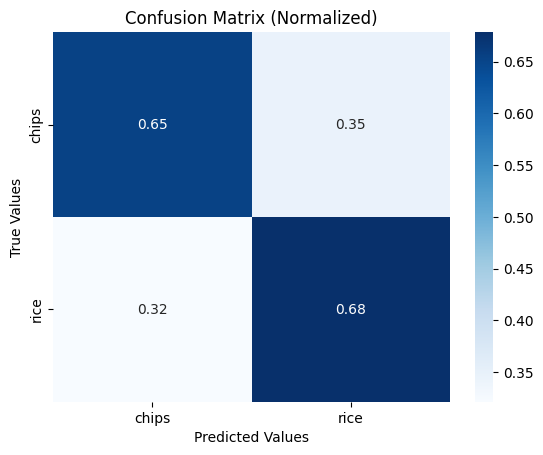

Training Accuracy: 100.00%
Testing Accuracy: 0.6666666666666666

Per Class Accuracies:
Class 'chips' Accuracy: 65.38%
Class 'rice' Accuracy: 67.86%

Classification Report:
              precision    recall  f1-score   support

       chips       0.65      0.65      0.65        26
        rice       0.68      0.68      0.68        28

    accuracy                           0.67        54
   macro avg       0.67      0.67      0.67        54
weighted avg       0.67      0.67      0.67        54



In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate accuracy for the training set
train_accuracy = model.score(X_train, y_train)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Calculate per class accuracies
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis], annot=True, cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix (Normalized)")
plt.show()

# Print results
print("Training Accuracy: {:.2%}".format(train_accuracy))
print("Testing Accuracy:", accuracy)
print("\nPer Class Accuracies:")
for label, acc in zip(model.classes_, class_accuracies):
    print(f"Class '{label}' Accuracy: {acc:.2%}")

print("\nClassification Report:")
print(class_report)

<h4>Interpreting the output</h4>
1. Training Accuracy: 100.00%<br>
The model achieved a perfect accuracy of 100% on the training set. This means that during training, the model correctly predicted all the labels in the training data.<br><br>
2. Testing Accuracy: 66.67%<br>
The model's accuracy on the testing set is approximately 66.67%. This indicates that, when presented with new, unseen data (testing set), the model correctly predicted the class labels for about two-thirds of the instances.<br><br>
3. Per Class Accuracies:<br>
Class 'chips' Accuracy: 65.38%
The model's accuracy for predicting the 'chips' class is 65.38%. This means that, among the instances where the true label is 'chips' in the testing set, the model correctly predicted 65.38% of them.
Class 'rice' Accuracy: 67.86%<br>
The model's accuracy for predicting the 'rice' class is 67.86%. This indicates that, among the instances where the true label is 'rice' in the testing set, the model correctly predicted 67.86% of them.
<br><br>
4. Classification Report:<br>
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.<br>
Precision for 'chips': 65% (Out of all instances predicted as 'chips', 65% are actually 'chips').<br>
Precision for 'rice': 68% (Out of all instances predicted as 'rice', 68% are actually 'rice').<br>
Recall:<br>
Recall is the ratio of correctly predicted positive observations to the all observations in the actual class.
Recall for 'chips': 65% (Out of all actual 'chips' instances, the model predicted 65%).
Recall for 'rice': 68% (Out of all actual 'rice' instances, the model predicted 68%).<br><br>

F1-Score:<br>
F1-score is the weighted average of precision and recall.<br>
F1-score for 'chips': 65%.<br>
F1-score for 'rice': 68%.<br>

# 9 Conclusions

In summary, the text classification model integrates a RandomForestClassifier within a comprehensive pipeline that includes feature extraction using a combination of CountVectorizer and TfidfTransformer. The model is designed to predict dish healthiness based on ingredient information. Through meticulous hyperparameter tuning using GridSearchCV, the RandomForestClassifier is optimized for optimal performance, while the 5-fold cross-validation strategy ensures robust evaluation across different subsets of the training data. This holistic approach, encompassing both feature extraction and classification, aims to capture the nuanced relationships within the ingredient data, making the model well-suited for discerning patterns that contribute to accurate predictions of dish healthiness. Continuous evaluation and potential refinements will further enhance the model's efficacy in leveraging both raw and transformed features for improved predictive performance.

1. The model achieved a perfect training accuracy of 100%, suggesting potential overfitting. While the model memorized the training data well, it may struggle to generalize to new, unseen data.<br>
2. The testing accuracy of approximately 66.67% is lower than the training accuracy. This indicates a performance drop when the model encounters new instances, highlighting the need for improvement.<br>
3. Class-specific accuracies reveal variations in the model's performance for predicting 'chips' and 'rice'. While both classes have decent accuracies, there is room for improvement.

Possible improvements:
1. Applying regularization techniques (e.g., dropout, L1/L2 regularization) to mitigate overfitting and improve the model's ability to generalize.
2. Fine-tune hyperparameters such as the regularization strength, learning rate, and kernel parameters to optimize the model's performance on the validation set.
3. Revisit the feature extraction process. Experiment with different techniques, such as adjusting the parameters of the HOG descriptor or considering alternative feature representations.